<a href="https://colab.research.google.com/github/Kwagalakwe-Grace/Computer-Vision-Project/blob/main/ML_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import cv2 
 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# defining global variable path and putting files in lists 
image_path = "/content/drive/MyDrive/cropped Images/crp" 
def loadImages(path): 
    image_files = sorted([os.path.join(path, file) 
         for file in os.listdir(path + "") if      file.endswith('.jpg')]) 
  
    return image_files 

In [4]:
images = loadImages(image_path)

print(images)

['/content/drive/MyDrive/cropped Images/crp/banana.jpg', '/content/drive/MyDrive/cropped Images/crp/banana1.jpg', '/content/drive/MyDrive/cropped Images/crp/banana10.jpg', '/content/drive/MyDrive/cropped Images/crp/banana100.jpg', '/content/drive/MyDrive/cropped Images/crp/banana101.jpg', '/content/drive/MyDrive/cropped Images/crp/banana102.jpg', '/content/drive/MyDrive/cropped Images/crp/banana103.jpg', '/content/drive/MyDrive/cropped Images/crp/banana104.jpg', '/content/drive/MyDrive/cropped Images/crp/banana105.jpg', '/content/drive/MyDrive/cropped Images/crp/banana106.jpg', '/content/drive/MyDrive/cropped Images/crp/banana107.jpg', '/content/drive/MyDrive/cropped Images/crp/banana108 (1).jpg', '/content/drive/MyDrive/cropped Images/crp/banana108 (2).jpg', '/content/drive/MyDrive/cropped Images/crp/banana108.jpg', '/content/drive/MyDrive/cropped Images/crp/banana109 (1).jpg', '/content/drive/MyDrive/cropped Images/crp/banana109 (2).jpg', '/content/drive/MyDrive/cropped Images/crp/ba

In [5]:

# Preprocessing 
def processing(data): 
    # loading image   
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data] 
    print('Original size',img[0].shape) 
    height = 224 
    width = 224 
    dim = (width, height) 
    res_img = [] 
    for i in range(len(img)): 
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR) 
        res_img.append(res) 
        
    print("RESIZED", res_img[1].shape) 
    no_noise = [] 
    for i in range(len(res_img)): 
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0) 
        no_noise.append(blur) 
    

In [6]:
data = loadImages(image_path)

In [48]:
processing(data)

Original size (714, 926, 3)
RESIZED (224, 224, 3)


Pixel values as features


In [7]:
#pixel values

img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data ]
 # resize 
height = 224 
width = 224 
dim = (width, height) 
res_img = [] 
for i in range(len(img)): 
    res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR) 
    pv = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY) 
    res_img.append(pv) 



In [8]:
#edges
from skimage.filters import sobel

img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data ]
# resize 
height = 224
width = 224
dim = (width, height) 
res_img = [] 
for i in range(len(img)): 
    res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR) 
    sobel_img = sobel(res) 
    res_img.append(sobel_img)

In [9]:
all_features = []
for i in range(len(res_img)):
    features = np.reshape(res_img[i], (145200))
    all_features.append(features) 
    print((features))
    

[0.02037707 0.04301826 0.02264119 ... 0.03710842 0.09314757 0.05857518]
[0.01235174 0.03205541 0.02119401 ... 0.01584883 0.0362259  0.02037707]
[0.40259664 0.3962518  0.39351643 ... 0.08158047 0.06521067 0.03991688]
[0.00804853 0.03064673 0.02929819 ... 0.26925151 0.28081501 0.2847945 ]
[0.36359466 0.36354002 0.36336725 ... 0.1178987  0.08913305 0.0755305 ]
[0.01825391 0.05664823 0.03855655 ... 0.21445294 0.15467913 0.06478753]
[0.01936119 0.06924558 0.05074733 ... 0.13402688 0.11236937 0.06262946]
[0.01687858 0.043542   0.04816306 ... 0.10259786 0.08573201 0.07441084]
[0.04732614 0.03138372 0.06472615 ... 0.05335336 0.07470305 0.03223264]
[0.02683721 0.03977819 0.0400391  ... 0.04986847 0.09059658 0.04082483]
[0.02363809 0.05548246 0.03300492 ... 0.15248349 0.09063934 0.05498069]
[0.02051809 0.05001982 0.029727   ... 0.17220331 0.12566114 0.09352345]
[0.02051809 0.05001982 0.029727   ... 0.17220331 0.12566114 0.09352345]
[0.02051809 0.05001982 0.029727   ... 0.17220331 0.12566114 0.09

In [11]:
import pandas as pd

We add the images path to a data frame

In [12]:
df_images = pd.DataFrame(data)

df_images

,0
0,/content/drive/MyDrive/cropped Images/crp/bana...
1,/content/drive/MyDrive/cropped Images/crp/bana...
2,/content/drive/MyDrive/cropped Images/crp/bana...
3,/content/drive/MyDrive/cropped Images/crp/bana...
4,/content/drive/MyDrive/cropped Images/crp/bana...
...,...
549,/content/drive/MyDrive/cropped Images/crp/cass...
550,/content/drive/MyDrive/cropped Images/crp/cass...
551,/content/drive/MyDrive/cropped Images/crp/cass...
552,/content/drive/MyDrive/cropped Images/crp/cass...


In [16]:
type(all_features)
all_features

[array([0.02037707, 0.04301826, 0.02264119, ..., 0.03710842, 0.09314757,
        0.05857518]),
 array([0.01235174, 0.03205541, 0.02119401, ..., 0.01584883, 0.0362259 ,
        0.02037707]),
 array([0.40259664, 0.3962518 , 0.39351643, ..., 0.08158047, 0.06521067,
        0.03991688]),
 array([0.00804853, 0.03064673, 0.02929819, ..., 0.26925151, 0.28081501,
        0.2847945 ]),
 array([0.36359466, 0.36354002, 0.36336725, ..., 0.1178987 , 0.08913305,
        0.0755305 ]),
 array([0.01825391, 0.05664823, 0.03855655, ..., 0.21445294, 0.15467913,
        0.06478753]),
 array([0.01936119, 0.06924558, 0.05074733, ..., 0.13402688, 0.11236937,
        0.06262946]),
 array([0.01687858, 0.043542  , 0.04816306, ..., 0.10259786, 0.08573201,
        0.07441084]),
 array([0.04732614, 0.03138372, 0.06472615, ..., 0.05335336, 0.07470305,
        0.03223264]),
 array([0.02683721, 0.03977819, 0.0400391 , ..., 0.04986847, 0.09059658,
        0.04082483]),
 array([0.02363809, 0.05548246, 0.03300492, ..., 0

Add features to Data Frame

In [17]:
df_features = pd.DataFrame(all_features)

In [15]:
df_features

,0,1,2,3,4,5,6,7,8,9,...,145190,145191,145192,145193,145194,145195,145196,145197,145198,145199
0,0.020377,0.043018,0.022641,0.020502,0.043078,0.022754,0.021179,0.043404,0.023365,0.021285,...,0.390003,0.328287,0.345439,0.359579,0.040820,0.076519,0.045701,0.037108,0.093148,0.058575
1,0.012352,0.032055,0.021194,0.049427,0.057724,0.052326,0.069997,0.077225,0.073994,0.056544,...,0.020377,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377
2,0.402597,0.396252,0.393516,0.297672,0.292760,0.290363,0.013031,0.021942,0.015238,0.012733,...,0.047588,0.102096,0.073374,0.031007,0.093500,0.079366,0.053629,0.081580,0.065211,0.039917
3,0.008049,0.030647,0.029298,0.019519,0.041927,0.034968,0.026825,0.045157,0.031139,0.022315,...,0.021256,0.092109,0.100558,0.098516,0.234711,0.242976,0.245367,0.269252,0.280815,0.284794
4,0.363595,0.363540,0.363367,0.331686,0.334387,0.336792,0.166907,0.176954,0.184253,0.025353,...,0.154629,0.078529,0.047809,0.046882,0.095398,0.082606,0.084289,0.117899,0.089133,0.075531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0.057741,0.054070,0.055124,0.141216,0.140722,0.138841,0.063183,0.057203,0.056642,0.095873,...,0.170936,0.109781,0.105213,0.087708,0.118705,0.125768,0.122841,0.117773,0.127493,0.127943
550,0.028682,0.022387,0.023949,0.038034,0.029734,0.031450,0.034313,0.025457,0.028527,0.122671,...,0.139611,0.100091,0.100911,0.087087,0.081781,0.066827,0.038387,0.046085,0.045882,0.030517
551,0.074911,0.073720,0.074111,0.038894,0.037251,0.038625,0.014224,0.005340,0.010627,0.014073,...,0.118662,0.153407,0.160260,0.147888,0.199495,0.194821,0.180104,0.157733,0.160726,0.158453
552,0.066793,0.066559,0.064664,0.044712,0.031041,0.025356,0.037726,0.033483,0.038722,0.045435,...,0.186818,0.226818,0.270981,0.271917,0.138036,0.168036,0.102178,0.171013,0.197747,0.146365


Merge the Features to the Image names

In [18]:
df_images_features = pd.merge(df_images, df_features, left_index=True, right_index=True)

In [19]:
df_images_features

,0_x,0_y,1,2,3,4,5,6,7,8,...,145190,145191,145192,145193,145194,145195,145196,145197,145198,145199
0,/content/drive/MyDrive/cropped Images/crp/bana...,0.020377,0.043018,0.022641,0.020502,0.043078,0.022754,0.021179,0.043404,0.023365,...,0.390003,0.328287,0.345439,0.359579,0.040820,0.076519,0.045701,0.037108,0.093148,0.058575
1,/content/drive/MyDrive/cropped Images/crp/bana...,0.012352,0.032055,0.021194,0.049427,0.057724,0.052326,0.069997,0.077225,0.073994,...,0.020377,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377
2,/content/drive/MyDrive/cropped Images/crp/bana...,0.402597,0.396252,0.393516,0.297672,0.292760,0.290363,0.013031,0.021942,0.015238,...,0.047588,0.102096,0.073374,0.031007,0.093500,0.079366,0.053629,0.081580,0.065211,0.039917
3,/content/drive/MyDrive/cropped Images/crp/bana...,0.008049,0.030647,0.029298,0.019519,0.041927,0.034968,0.026825,0.045157,0.031139,...,0.021256,0.092109,0.100558,0.098516,0.234711,0.242976,0.245367,0.269252,0.280815,0.284794
4,/content/drive/MyDrive/cropped Images/crp/bana...,0.363595,0.363540,0.363367,0.331686,0.334387,0.336792,0.166907,0.176954,0.184253,...,0.154629,0.078529,0.047809,0.046882,0.095398,0.082606,0.084289,0.117899,0.089133,0.075531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,/content/drive/MyDrive/cropped Images/crp/cass...,0.057741,0.054070,0.055124,0.141216,0.140722,0.138841,0.063183,0.057203,0.056642,...,0.170936,0.109781,0.105213,0.087708,0.118705,0.125768,0.122841,0.117773,0.127493,0.127943
550,/content/drive/MyDrive/cropped Images/crp/cass...,0.028682,0.022387,0.023949,0.038034,0.029734,0.031450,0.034313,0.025457,0.028527,...,0.139611,0.100091,0.100911,0.087087,0.081781,0.066827,0.038387,0.046085,0.045882,0.030517
551,/content/drive/MyDrive/cropped Images/crp/cass...,0.074911,0.073720,0.074111,0.038894,0.037251,0.038625,0.014224,0.005340,0.010627,...,0.118662,0.153407,0.160260,0.147888,0.199495,0.194821,0.180104,0.157733,0.160726,0.158453
552,/content/drive/MyDrive/cropped Images/crp/cass...,0.066793,0.066559,0.064664,0.044712,0.031041,0.025356,0.037726,0.033483,0.038722,...,0.186818,0.226818,0.270981,0.271917,0.138036,0.168036,0.102178,0.171013,0.197747,0.146365


We shall now add a classification column to the dataframe
<p>1 - Banana</p>
<p>0 - Cassava</p>

In [20]:
def image_class (row):
   if 'banana' in row['0_x'] :
      return 1
   if 'cassava' in row['0_x'] :
      return 0
   return 2

In [21]:
df_images_features['class_label'] = df_images_features.apply (lambda row: image_class(row), axis=1)

In [22]:
df_images_features

,0_x,0_y,1,2,3,4,5,6,7,8,...,145191,145192,145193,145194,145195,145196,145197,145198,145199,class_label
0,/content/drive/MyDrive/cropped Images/crp/bana...,0.020377,0.043018,0.022641,0.020502,0.043078,0.022754,0.021179,0.043404,0.023365,...,0.328287,0.345439,0.359579,0.040820,0.076519,0.045701,0.037108,0.093148,0.058575,1
1,/content/drive/MyDrive/cropped Images/crp/bana...,0.012352,0.032055,0.021194,0.049427,0.057724,0.052326,0.069997,0.077225,0.073994,...,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377,0.015849,0.036226,0.020377,1
2,/content/drive/MyDrive/cropped Images/crp/bana...,0.402597,0.396252,0.393516,0.297672,0.292760,0.290363,0.013031,0.021942,0.015238,...,0.102096,0.073374,0.031007,0.093500,0.079366,0.053629,0.081580,0.065211,0.039917,1
3,/content/drive/MyDrive/cropped Images/crp/bana...,0.008049,0.030647,0.029298,0.019519,0.041927,0.034968,0.026825,0.045157,0.031139,...,0.092109,0.100558,0.098516,0.234711,0.242976,0.245367,0.269252,0.280815,0.284794,1
4,/content/drive/MyDrive/cropped Images/crp/bana...,0.363595,0.363540,0.363367,0.331686,0.334387,0.336792,0.166907,0.176954,0.184253,...,0.078529,0.047809,0.046882,0.095398,0.082606,0.084289,0.117899,0.089133,0.075531,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,/content/drive/MyDrive/cropped Images/crp/cass...,0.057741,0.054070,0.055124,0.141216,0.140722,0.138841,0.063183,0.057203,0.056642,...,0.109781,0.105213,0.087708,0.118705,0.125768,0.122841,0.117773,0.127493,0.127943,0
550,/content/drive/MyDrive/cropped Images/crp/cass...,0.028682,0.022387,0.023949,0.038034,0.029734,0.031450,0.034313,0.025457,0.028527,...,0.100091,0.100911,0.087087,0.081781,0.066827,0.038387,0.046085,0.045882,0.030517,0
551,/content/drive/MyDrive/cropped Images/crp/cass...,0.074911,0.073720,0.074111,0.038894,0.037251,0.038625,0.014224,0.005340,0.010627,...,0.153407,0.160260,0.147888,0.199495,0.194821,0.180104,0.157733,0.160726,0.158453,0
552,/content/drive/MyDrive/cropped Images/crp/cass...,0.066793,0.066559,0.064664,0.044712,0.031041,0.025356,0.037726,0.033483,0.038722,...,0.226818,0.270981,0.271917,0.138036,0.168036,0.102178,0.171013,0.197747,0.146365,0


In [23]:
df_images_features.describe()

,0_y,1,2,3,4,5,6,7,8,9,...,145191,145192,145193,145194,145195,145196,145197,145198,145199,class_label
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,0.090090,0.097976,0.090229,0.087186,0.096180,0.088298,0.077969,0.087040,0.078605,0.078359,...,0.091054,0.094670,0.085305,0.088503,0.091072,0.081009,0.088164,0.090186,0.078964,0.518051
std,0.091538,0.088182,0.091396,0.085300,0.082632,0.087622,0.076210,0.073790,0.077364,0.072619,...,0.077589,0.075562,0.078565,0.077565,0.075246,0.076841,0.078411,0.074934,0.075826,0.503728
min,0.002264,0.002264,0.004528,0.001132,0.002264,0.004528,0.000800,0.002264,0.004528,0.002264,...,0.008625,0.002401,0.004668,0.009969,0.002401,0.004869,0.011321,0.002773,0.004528,0.000000
25%,0.023966,0.043498,0.032983,0.024493,0.042536,0.031738,0.023523,0.044017,0.035159,0.022987,...,0.022624,0.038490,0.024957,0.022493,0.038490,0.024905,0.018742,0.038490,0.024905,0.000000
50%,0.055581,0.066615,0.052194,0.053812,0.068097,0.050352,0.055024,0.067183,0.049520,0.055143,...,0.071086,0.071338,0.056752,0.069325,0.070358,0.053629,0.069019,0.070627,0.050969,1.000000
75%,0.123640,0.120033,0.112515,0.114049,0.114602,0.108761,0.099453,0.099558,0.091280,0.112344,...,0.134603,0.126451,0.113637,0.126048,0.122071,0.111673,0.129579,0.116220,0.101862,1.000000
max,0.462105,0.462944,0.461053,0.443840,0.465182,0.484405,0.460066,0.469248,0.482864,0.404900,...,0.401469,0.412254,0.433709,0.414950,0.427355,0.439999,0.414886,0.414380,0.413317,2.000000


In [24]:
df_images_features.describe().T

,count,mean,std,min,25%,50%,75%,max
0_y,554.0,0.090090,0.091538,0.002264,0.023966,0.055581,0.123640,0.462105
1,554.0,0.097976,0.088182,0.002264,0.043498,0.066615,0.120033,0.462944
2,554.0,0.090229,0.091396,0.004528,0.032983,0.052194,0.112515,0.461053
3,554.0,0.087186,0.085300,0.001132,0.024493,0.053812,0.114049,0.443840
4,554.0,0.096180,0.082632,0.002264,0.042536,0.068097,0.114602,0.465182
...,...,...,...,...,...,...,...,...
145196,554.0,0.081009,0.076841,0.004869,0.024905,0.053629,0.111673,0.439999
145197,554.0,0.088164,0.078411,0.011321,0.018742,0.069019,0.129579,0.414886
145198,554.0,0.090186,0.074934,0.002773,0.038490,0.070627,0.116220,0.414380
145199,554.0,0.078964,0.075826,0.004528,0.024905,0.050969,0.101862,0.413317


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [27]:
y = df_images_features['class_label']
X = df_images_features.drop('class_label', axis = 1)
X = df_images_features.drop('0_x', axis = 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)
 # Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state = 40)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[[-0.76226929 -0.62379826 -0.74017631 ...  0.03955658 -0.26913297
   0.95762918]
 [-0.85002101 -0.74823105 -0.75602473 ... -0.72075659 -0.77334622
   0.95762918]
 [ 3.41705276  3.38554825  3.32138809 ... -0.33360179 -0.51542163
   0.95762918]
 ...
 [-0.16597438 -0.27532309 -0.17651085 ...  0.94221664  1.04925084
  -1.02936171]
 [-0.25473803 -0.35660225 -0.27996938 ...  1.43670657  0.88969085
  -1.02936171]
 [ 0.12528861 -0.02430517  0.01625752 ...  0.69075042  0.20956025
  -1.02936171]]


In [28]:
print(y, y_test, y_train)

0      1
1      1
2      1
3      1
4      1
      ..
549    0
550    0
551    0
552    0
553    0
Name: class_label, Length: 554, dtype: int64 340    0
486    0
0      1
468    0
200    1
      ..
424    0
265    1
355    0
54     1
185    1
Name: class_label, Length: 167, dtype: int64 217    1
359    0
464    0
401    0
452    0
      ..
440    0
165    1
7      1
219    1
326    0
Name: class_label, Length: 387, dtype: int64


Train the model

In [37]:

K = []
training = []
test = []
scores = {}
  
for k in range(2, 7):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [38]:
for keys, values in scores.items():
	print(keys, ':', values)


2 : [0.9224806201550387, 0.8682634730538922]
3 : [0.9224806201550387, 0.8682634730538922]
4 : [0.8372093023255814, 0.7844311377245509]
5 : [0.8888888888888888, 0.8622754491017964]
6 : [0.8578811369509044, 0.8083832335329342]


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=3 )

# model training
classifer.fit(X_train,y_train)

# testing the model
y_pred= classifer.predict(X_test)



In [40]:
# importing accuracy_score
from sklearn.metrics import accuracy_score

# printing accuracy
print(accuracy_score(y_test,y_pred))

0.8682634730538922


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        74
           1       1.00      0.76      0.87        93

    accuracy                           0.87       167
   macro avg       0.89      0.88      0.87       167
weighted avg       0.90      0.87      0.87       167



 Plotting the training and test scores graph

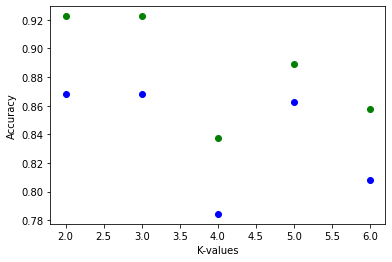

In [42]:
plt.scatter(K, training, color ='g')
plt.scatter(K, test, color ='b')
plt.ylabel("Accuracy")
plt.xlabel("K-values")
plt.show()
